<a href="https://colab.research.google.com/github/lspolatova/chinese/blob/development/creating_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
from bs4 import BeautifulSoup
import re
URL = 'https://chineseplus.ru/leksika-dlya-hsk?field_level_hsk_tid=All'
HEADERS = {'user-agent': 'Mozilla/5.0 (Linux; Android 6.0; Nexus 5 Build/MRA58N) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/95.0.4638.54 Mobile Safari/537.36 Edg/95.0.1020.40', 'accept': '*/*'}

def get_html(url, params=None):
    r = requests.get(url, headers=HEADERS, params=params)
    return r

def get_pages_count(html):
    soup = BeautifulSoup(html, 'html.parser')
    if(soup.find('li', class_='pager-last')):
        pagination = int(soup.find('li', class_='pager-last').find_next('a').get('href').split('=')[-1])
        return pagination
    else:
        return 1
    
def get_content(html):
    soup = BeautifulSoup(html, 'html.parser')
    items = soup.find_all('td', class_='views-field views-field-title')
    letters = set()
    for item in items:
        word = list(item.get_text(strip=True))
        for letter in word:
            letters.add(letter)
    return letters
        
def parse():
    html = get_html(URL)
    if html.status_code == 200:      
        letters = get_content(html.text)
        pages_count = get_pages_count(html.text)
        for page in range(1, pages_count + 1):
            print(f'Парсинг страницы {page + 1} из {pages_count + 1}...')
            html = get_html(URL, params={'page': page})
            letters.update(get_content(html.text))
        print(f'Получено {len(letters)} иероглифов')
        return letters
    else:
        print('Error')

letters = parse()

Парсинг страницы 2 из 50...
Парсинг страницы 3 из 50...
Парсинг страницы 4 из 50...
Парсинг страницы 5 из 50...
Парсинг страницы 6 из 50...
Парсинг страницы 7 из 50...
Парсинг страницы 8 из 50...
Парсинг страницы 9 из 50...
Парсинг страницы 10 из 50...
Парсинг страницы 11 из 50...
Парсинг страницы 12 из 50...
Парсинг страницы 13 из 50...
Парсинг страницы 14 из 50...
Парсинг страницы 15 из 50...
Парсинг страницы 16 из 50...
Парсинг страницы 17 из 50...
Парсинг страницы 18 из 50...
Парсинг страницы 19 из 50...
Парсинг страницы 20 из 50...
Парсинг страницы 21 из 50...
Парсинг страницы 22 из 50...
Парсинг страницы 23 из 50...
Парсинг страницы 24 из 50...
Парсинг страницы 25 из 50...
Парсинг страницы 26 из 50...
Парсинг страницы 27 из 50...
Парсинг страницы 28 из 50...
Парсинг страницы 29 из 50...
Парсинг страницы 30 из 50...
Парсинг страницы 31 из 50...
Парсинг страницы 32 из 50...
Парсинг страницы 33 из 50...
Парсинг страницы 34 из 50...
Парсинг страницы 35 из 50...
Парсинг страницы 36 из

In [ ]:
import re
#letters = set()
import codecs
with codecs.open('/root/chinese-word-list.txt', encoding = 'utf-8') as f:
    for line in f:
        line = re.sub("^\s+|\n|\r|0|3|5|\s+$", '', line)
        for chin in re.findall(r'[\u3400-\u4BDF\u4E00-\u9FFF\uF900-\uFAFF\u3400-\u4BDF\u4E00-\u9FFF\uF900-\uFAFF]', line):
            for letter in line:
                letters.add(letter)
#print(letters)
f.closed

True

In [2]:
print(len(letters))

2665


In [3]:
print(letters)

{'析', '骚', '胃', '蚁', '丢', '事', '波', '固', '腾', '疙', '霜', '给', '量', '另', '脖', '古', '朝', '普', '猴', '出', '惯', '脏', '迸', '奢', '疏', '蔬', '墙', '魅', '猛', '吩', '输', '押', '攻', '行', '落', '绒', '脚', '方', '陋', '呵', '举', '型', '寻', '希', '息', '怕', '寂', '测', '觅', '紫', '蹦', '关', '贼', '活', '寞', '汰', '淀', '滚', '旷', '奴', '恭', '音', '接', '薄', '瓜', '烤', '丛', '夫', '焰', '惑', '匆', '畅', '湿', '偶', '拘', '枕', '谜', '恕', '塔', '诚', '奉', '叫', '蔑', '胡', '播', '阶', '违', '座', '夸', '塌', '旱', '两', '姑', '向', '奏', '洲', '术', '顿', '努', '晒', '泣', '级', '馅', '拾', '凌', '稍', '较', '单', '诬', '辛', '磅', '彰', '消', '郎', '匀', '搂', '乱', '昌', '午', '凭', '形', '告', '射', '医', '奇', '乏', '珠', '斜', '毛', '嫉', '铃', '帐', '慌', '港', '患', '法', '箱', '瓦', '震', '霞', '踢', '洋', '挽', '经', '乖', '酸', '宵', '铺', '罩', '欺', '娘', '悄', '宜', '劝', '炉', '子', '榨', '算', '滤', '宙', '脱', '角', '纪', '刮', '河', '晃', '欣', '抄', '粗', '娶', '拌', '影', '滞', '为', '滨', '懂', '墓', '害', '族', '四', '领', '他', '姓', '夕', '济', '脸', '深', '猾', '退', '虑', '伟', '更', '润', '耳', '伺', '挫', '大', '谁', '垂', '篮',

In [5]:
import numpy as np
from PIL import Image, ImageFilter, ImageDraw, ImageFont
counter = 0
X_data = []
for letter in letters:
    img = Image.new('RGB', (32, 32), 'white')
    idraw = ImageDraw.Draw(img)
    line = ImageFont.truetype('/root/simsun.ttc', size = 22, encoding='utf-8')
    idraw.text((5, 5), letter, font = line, fill = 'black')
    X_data.append(np.asarray(img))
    counter = counter + 1
    if(not counter%10000):
        print(f'Создано картинок {counter} из {len(letters)}...')

In [6]:
y = range(0, len(letters))

In [7]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager

print(tf.__version__)

2.7.0


In [8]:
from sklearn.model_selection import train_test_split
train_images, test_images, train_labels, test_labels = train_test_split(X_data, y, test_size=0.3)

In [9]:
 import itertools
 from sklearn import preprocessing
 train_images = np.array(list(itertools.islice(itertools.cycle(train_images), len(train_images)*50)))
 train_labels = np.array(list(itertools.islice(itertools.cycle(train_labels), len(train_labels)*50)))

In [10]:

train_images = train_images / 255.0
#test_images = test_images / 255.0

In [11]:
train_images.shape

(93250, 32, 32, 3)

In [12]:
letters = list(letters)

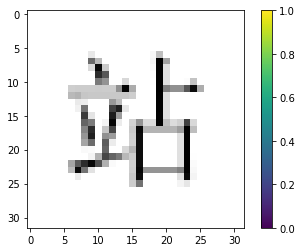

In [13]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [14]:
train_images.shape

(93250, 32, 32, 3)

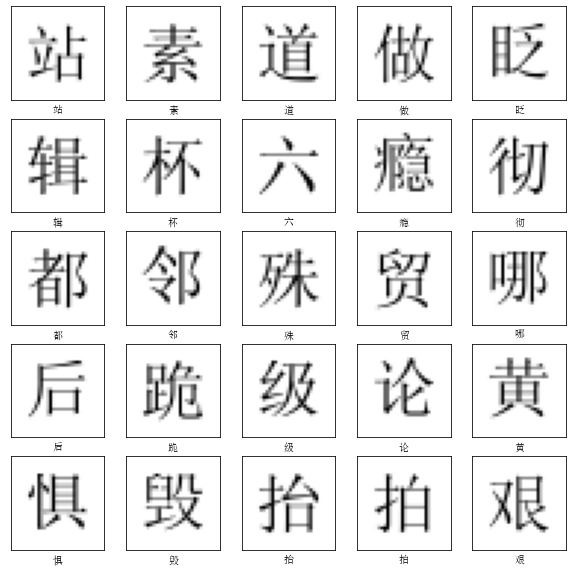

In [20]:
prop = font_manager.FontProperties(fname='/root/simsun.ttc')
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(letters[train_labels[i]], fontproperties=prop)
plt.show()

In [21]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models, losses

In [27]:
model = models.Sequential()
#сыерточный слой, 6 фильтровс 5 на 5 
model.add(layers.Conv2D(6, 5, activation='tanh', input_shape=train_images.shape[1:]))
#Операция средней подвыборки уменьшает входное значение на половину
model.add(layers.AveragePooling2D(2))
#функция активации 
model.add(layers.Activation('sigmoid'))
model.add(layers.Conv2D(16, 5, activation='tanh'))
model.add(layers.AveragePooling2D(2))
model.add(layers.Activation('sigmoid'))
model.add(layers.Conv2D(120, 5, activation='tanh'))
model.add(layers.Flatten())
model.add(layers.Dense(21320, activation='tanh'))
model.add(layers.Dense(2665, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 6)         456       
                                                                 
 average_pooling2d_4 (Averag  (None, 14, 14, 6)        0         
 ePooling2D)                                                     
                                                                 
 activation_4 (Activation)   (None, 14, 14, 6)         0         
                                                                 
 conv2d_7 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_5 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 activation_5 (Activation)   (None, 5, 5, 16)         

In [23]:
x_val = train_images[-2000:,:,:,:] 
y_val = train_labels[-2000:] 

In [29]:
model.compile(optimizer='adam', loss=losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [30]:
history = model.fit(train_images, train_labels,  batch_size=64, epochs=40, validation_data=(x_val, y_val))

Epoch 1/40
1458/1458 [==============================] - 1091s 748ms/step - loss: 7.7542 - accuracy: 4.0751e-04 - val_loss: 8.2783 - val_accuracy: 5.0000e-04
Epoch 2/40
1458/1458 [==============================] - 1067s 732ms/step - loss: 7.8021 - accuracy: 4.6113e-04 - val_loss: 8.4643 - val_accuracy: 0.0010
Epoch 3/40
1458/1458 [==============================] - 1077s 739ms/step - loss: 7.8421 - accuracy: 3.9678e-04 - val_loss: 9.3107 - val_accuracy: 5.0000e-04
Epoch 4/40
1458/1458 [==============================] - 1065s 731ms/step - loss: 7.8558 - accuracy: 5.8981e-04 - val_loss: 8.2319 - val_accuracy: 5.0000e-04
Epoch 5/40
1458/1458 [==============================] - 1062s 729ms/step - loss: 7.8676 - accuracy: 5.3619e-04 - val_loss: 9.2017 - val_accuracy: 5.0000e-04
Epoch 6/40
1458/1458 [==============================] - 1084s 744ms/step - loss: 7.8788 - accuracy: 6.1126e-04 - val_loss: 8.5061 - val_accuracy: 5.0000e-04
Epoch 7/40
1458/1458 [==============================] - 1125s 

KeyboardInterrupt: ignored